# 線形回帰 (単回帰・重回帰)

## 単回帰

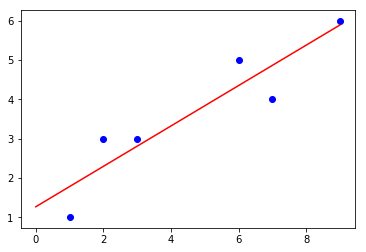

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleRegression:
    def __init__(self):
        self.intercept = None # 切片
        self.coefficient = None # 傾き
        
    def fit(self, x, y):
        n = len(x) # 要素数
        self.coefficient = (np.dot(x, y) - x.sum() * y.sum() / n) / ((x**2).sum() - x.sum()**2 / n)
        self.intercept = (y.sum() - self.coefficient * x.sum()) / n
        
    def predict(self, x):
        return self.coefficient * x + self.intercept
    
if __name__=="__main__":
    x = np.array([1, 2, 3, 6, 7, 9]) # 学習データの説明変数x
    y = np.array([1, 3, 3, 5, 4, 6]) # 学習データの目的変数y
    model = SimpleRegression()
    model.fit(x, y)
    
    # グラフの表示
    plt.scatter(x, y, color = "blue") # 学習データの分布を表示
    x_max = x.max()
    plt.plot([0, x_max], [model.intercept, model.coefficient * x_max + model.intercept], color = "red") # 回帰直線の表示
    plt.show()

## 重回帰

定数項: 1.5466764740001508
偏回帰係数: [2.00318302 2.9935413 ]
重み: [1.54667647 2.00318302 2.9935413 ]


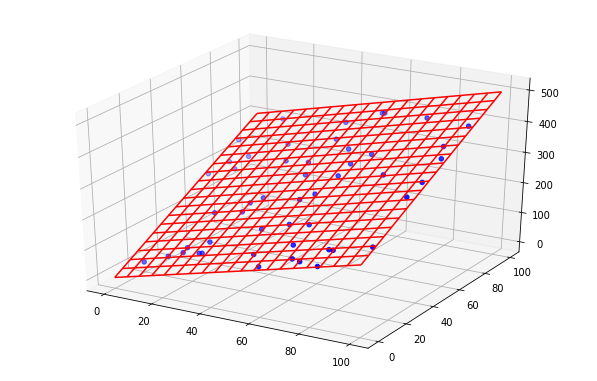

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearRegression:
    def __init__(self):
        self.weight = None # 重み
        self.intercept = None # 定数項
        self.coefficient = None # 偏回帰係数
        
    def fit(self, x, y):
        x_tilda = np.c_[np.ones(x.shape[0]), x]
        A = np.dot(x_tilda.T, x_tilda)
        B = np.dot(x_tilda.T, y)
        self.weight = np.dot(np.linalg.inv(A), B) # np.linalg.inv: 逆行列に変換
        self.intercept = self.weight[0]
        self.coefficient = self.weight[1:]
        
    def predict(self, x):
        if x.ndim == 1:
            x = x.reshape(1, -1)
            
        x_tilda = np.c_[np.ones(x.shape[0]), x]
        return np.dot(x_tilda, self.weight)
    
if __name__=="__main__":
    # 適当な学習データを生成
    n = 50 # 要素数
    scale = 100
    np.random.seed(0) # 乱数生成器のシード値を固定
    x = np.random.random((n, 2)) * scale # 説明変数x
    w0, w1, w2 = 1, 2, 3
    y = np.random.randn(n) + w0 + w1 * x[:, 0] + w2 * x[:, 1] # 目的変数y
    
    model = LinearRegression()
    model.fit(x, y)
    
    print("定数項:", model.intercept)
    print("偏回帰係数:", model.coefficient)
    print("重み:", model.weight)
    
    # グラフの表示
    x_grid, y_grid = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
    z = (model.weight[0] + model.weight[1] * x_grid.flatten() + model.weight[2] * y_grid.flatten()).reshape(x_grid.shape)
    ax = Axes3D(plt.figure(figsize = (8, 5)))
    ax.scatter3D(x[:, 0], x[:, 1], y, color = "blue") # 入力データの分布を表示
    ax.plot_wireframe(x_grid, y_grid, z, color = "red") # 回帰平面の表示


# 多項式回帰

重み: [-7.01563083e+02  5.91536883e+02 -1.96841275e+02  3.29365640e+01
 -2.86422716e+00  1.18074735e-01 -1.61859505e-03]


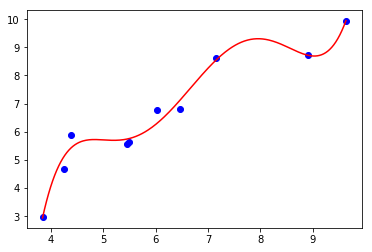

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearRegression:
    def __init__(self):
        self.weight = None # 重み
        self.intercept = None # 定数項
        self.coefficient = None # 偏回帰係数
        
    def fit(self, x, y):
        x_tilda = np.c_[np.ones(x.shape[0]), x]
        A = np.dot(x_tilda.T, x_tilda)
        B = np.dot(x_tilda.T, y)
        self.weight = np.dot(np.linalg.inv(A), B) # np.linalg.inv: 逆行列に変換
        self.intercept = self.weight[0]
        self.coefficient = self.weight[1:]
        
    def predict(self, x):
        if x.ndim == 1:
            x = x.reshape(1, -1)
            
        x_tilda = np.c_[np.ones(x.shape[0]), x]
        return np.dot(x_tilda, self.weight)

class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.weight = None
    
    def fit(self, x, y):
        x_pow = []
        xx = x.reshape(len(x), 1)
        for i in range(1, self.degree + 1):
            x_pow.append(xx**i)
        
        matrix = np.concatenate(x_pow, axis = 1)
        lr = LinearRegression() # 線形回帰を利用
        lr.fit(matrix, y)
        self.weight = lr.weight
        
    def predict(self, x):
        r = 0
        for i in range(self.degree + 1):
            r += x**i * self.weight[i]
            
        return r
    
if __name__=="__main__":
    # 適当な学習データを生成
    np.random.seed(0) # 乱数生成器のシード値を固定
    x = np.random.random(10) * 10
    y = x + np.random.randn(10) # 2*x + 1 にノイズが乗った点
    
    model = PolynomialRegression(6) # 6次関数で近似 (例)
    model.fit(x, y)
    
    print("重み:", model.weight)
    
    # グラフの表示
    plt.scatter(x, y, color = "blue")
    xx = np.linspace(x.min(), x.max(), 300) # x_minからx_maxまで等間隔に300の点を生成
    yy = np.array([model.predict(i) for i in xx])
    plt.plot(xx, yy, color = "red")